<a href="https://colab.research.google.com/github/DhusorAust/Time_series_analysis_using_prophet/blob/master/demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/datasets.csv')

In [ ]:
df = data.rename(columns={'XPO_LOAD_DATE': 'ds','TOT_QTY': 'y', 'ITEM_CODE': 'items'})


In [ ]:
df['ds']='20'+df['ds']+'20'

In [ ]:
df

,items,ds,y,COMMODITY
0,100015,2020-Jun20,98.0,APPLE
1,100015,2020-May20,49.0,APPLE
2,100015,2020-Jun20,147.0,APPLE
3,100015,2020-Jun20,147.0,APPLE
4,100015,2020-Jun20,98.0,APPLE
...,...,...,...,...
235876,219024,2020-Jun20,75.0,STONE FRUIT
235877,219024,2020-Jun20,75.0,STONE FRUIT
235878,219040,2020-Jun20,160.0,AVOCADO
235879,219193,2020-Jun20,51.0,MELON


In [ ]:
df['ds'] = pd.to_datetime(df['ds'] )

In [ ]:
df

,items,ds,y,COMMODITY
0,100015,2020-06-20,98.0,APPLE
1,100015,2020-05-20,49.0,APPLE
2,100015,2020-06-20,147.0,APPLE
3,100015,2020-06-20,147.0,APPLE
4,100015,2020-06-20,98.0,APPLE
...,...,...,...,...
235876,219024,2020-06-20,75.0,STONE FRUIT
235877,219024,2020-06-20,75.0,STONE FRUIT
235878,219040,2020-06-20,160.0,AVOCADO
235879,219193,2020-06-20,51.0,MELON


In [ ]:
df=df.groupby(['items','ds'])['y'].sum()

In [ ]:
df

items   ds        
100015  2020-01-20    3430.0
        2020-02-20    3038.0
        2020-03-20    3822.0
        2020-04-20    3528.0
        2020-05-20    3675.0
                       ...  
219023  2020-06-20     525.0
219024  2020-06-20     300.0
219040  2020-06-20     160.0
219193  2020-06-20      51.0
219226  2020-06-20     125.0
Name: y, Length: 10554, dtype: float64

In [ ]:
df.to_csv('clean.csv')

In [ ]:
df=df.reset_index()

In [ ]:
df

,items,ds,y
0,100015,2020-01-20,3430.0
1,100015,2020-02-20,3038.0
2,100015,2020-03-20,3822.0
3,100015,2020-04-20,3528.0
4,100015,2020-05-20,3675.0
...,...,...,...
10549,219023,2020-06-20,525.0
10550,219024,2020-06-20,300.0
10551,219040,2020-06-20,160.0
10552,219193,2020-06-20,51.0


In [ ]:
df['items'].unique()

array([100015, 100017, 100019, ..., 219040, 219193, 219226])

In [ ]:
df['ds'].unique()

array(['2020-01-20T00:00:00.000000000', '2020-02-20T00:00:00.000000000',
       '2020-03-20T00:00:00.000000000', '2020-04-20T00:00:00.000000000',
       '2020-05-20T00:00:00.000000000', '2020-06-20T00:00:00.000000000',
       '2020-07-20T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
items= df.groupby('items').filter(lambda x: len(x) > 5)

In [ ]:
items= items.groupby('items')

In [ ]:
items.head()

,items,ds,y
0,100015,2020-01-20,3430.0
1,100015,2020-02-20,3038.0
2,100015,2020-03-20,3822.0
3,100015,2020-04-20,3528.0
4,100015,2020-05-20,3675.0
...,...,...,...
10324,217194,2020-01-20,210.0
10325,217194,2020-02-20,203.0
10326,217194,2020-03-20,289.0
10327,217194,2020-04-20,170.0


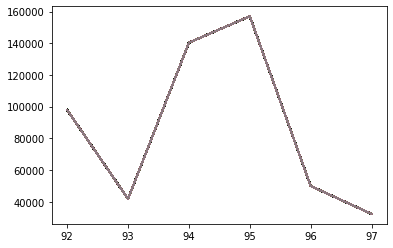

In [ ]:
for i in items:
  df.query("items=='100175'")['y'].plot()

In [ ]:
target = pd.DataFrame()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disab

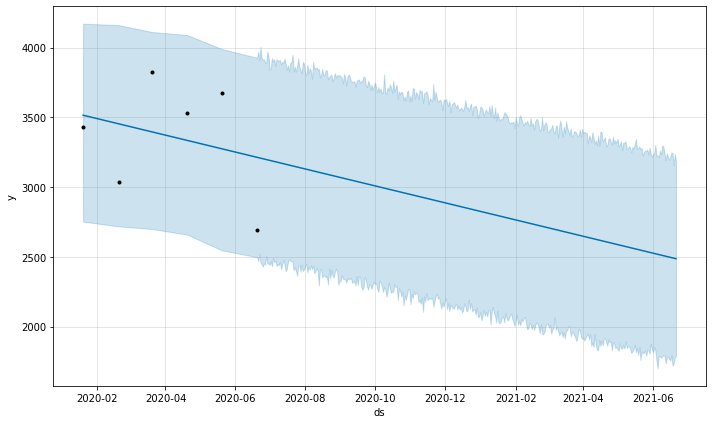

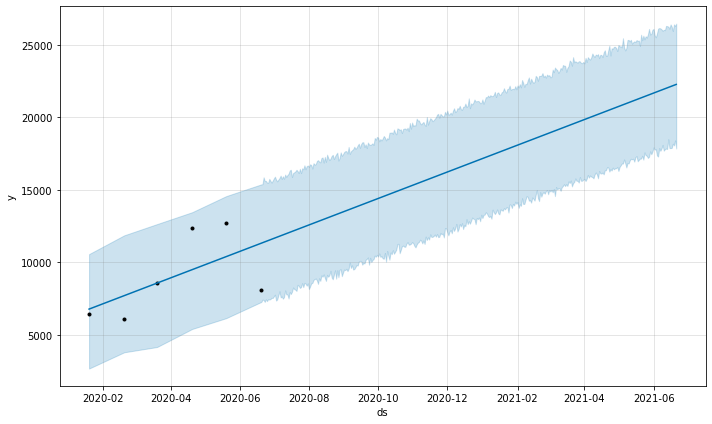

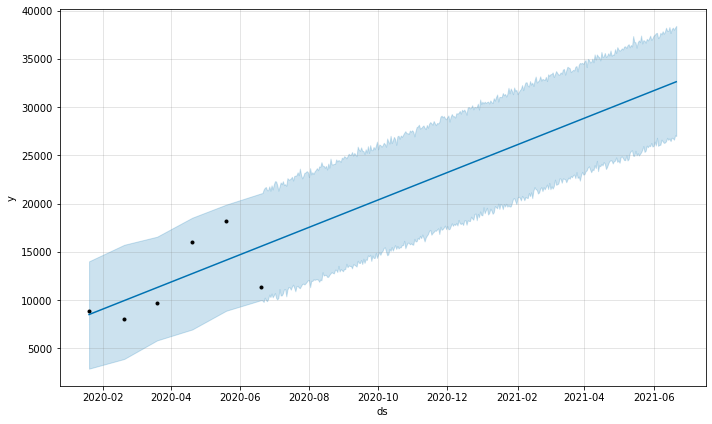

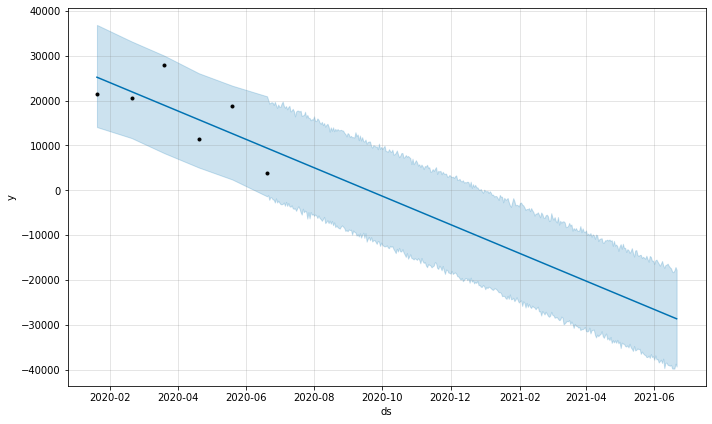

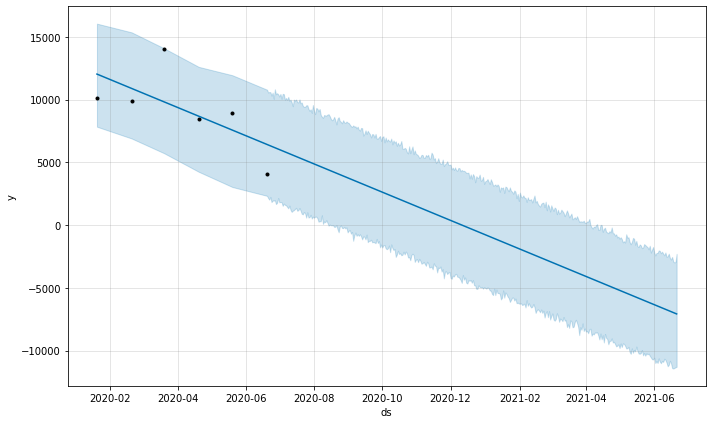

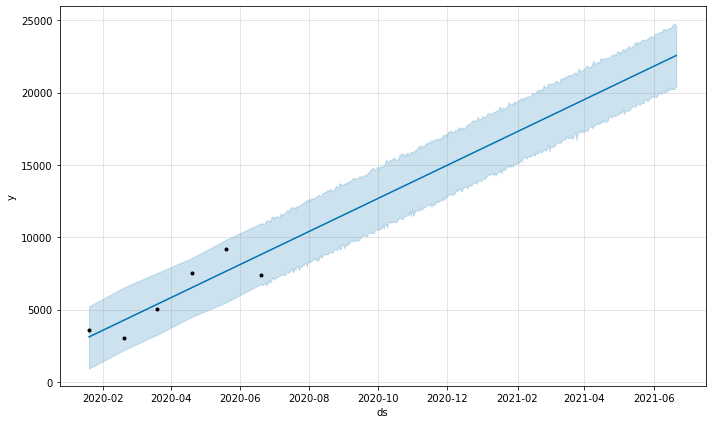

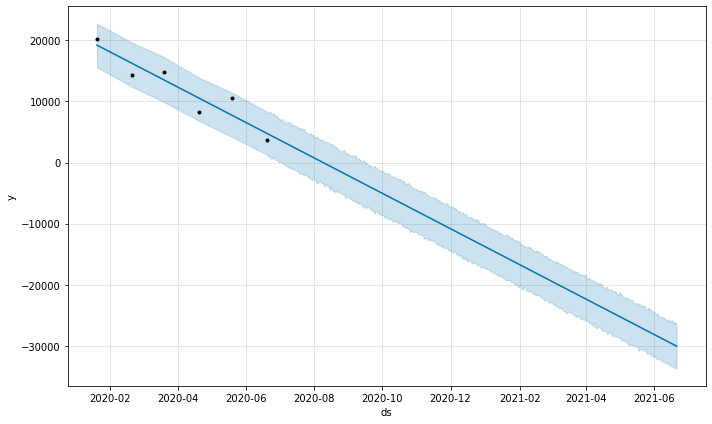

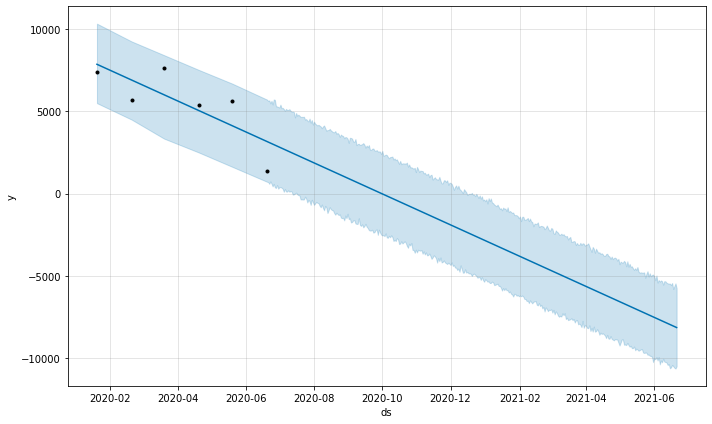

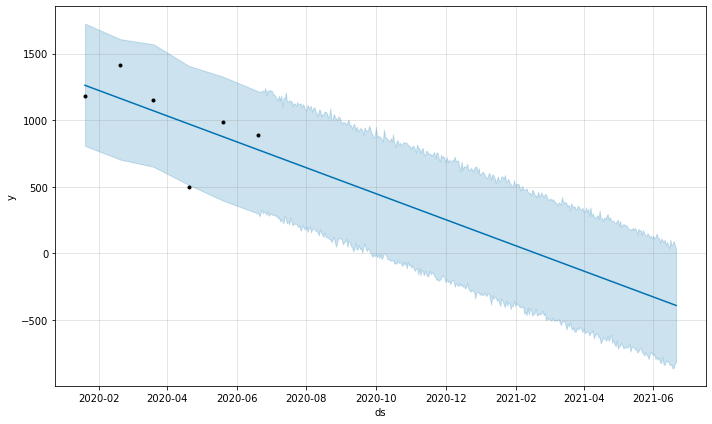

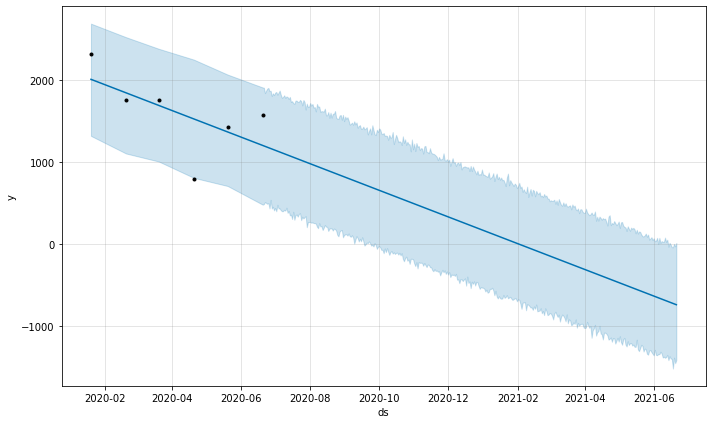

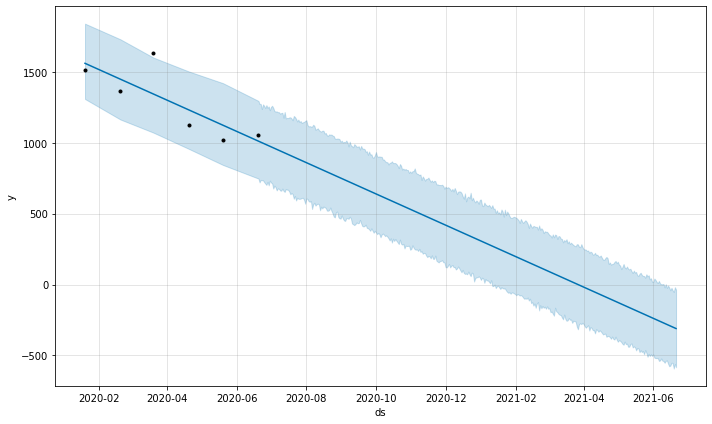

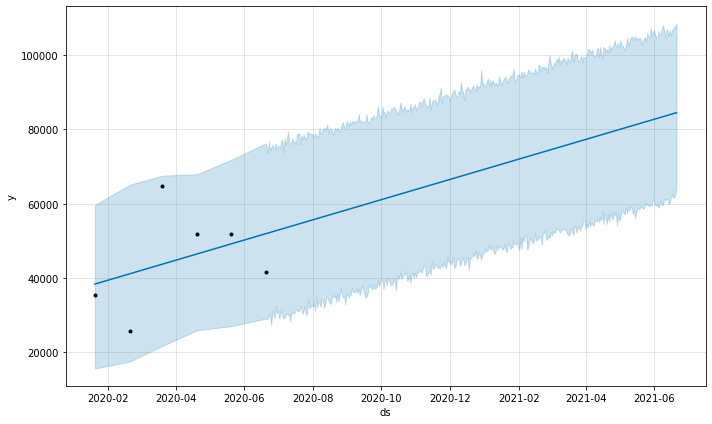

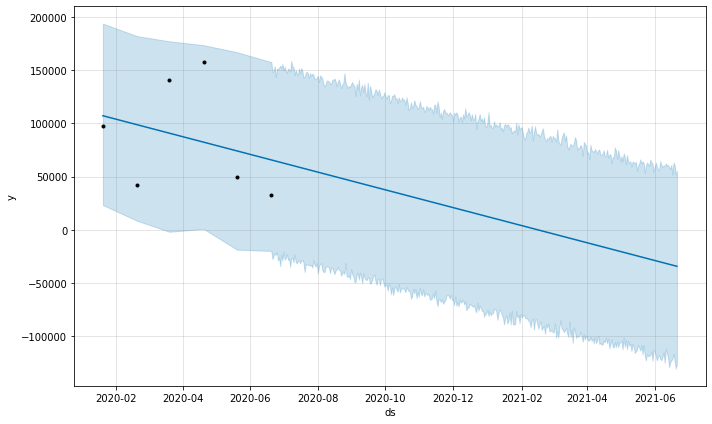

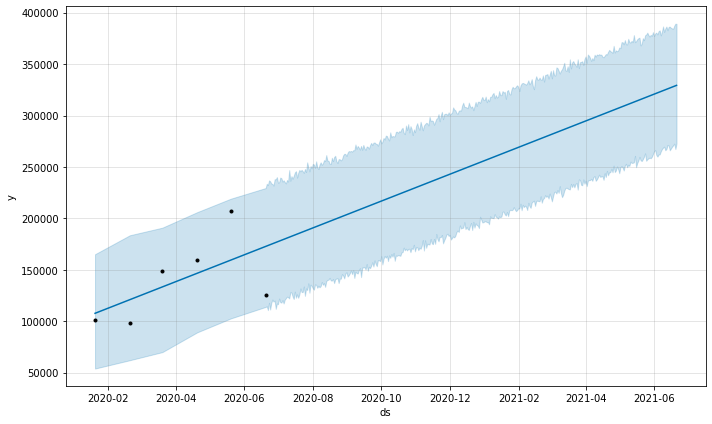

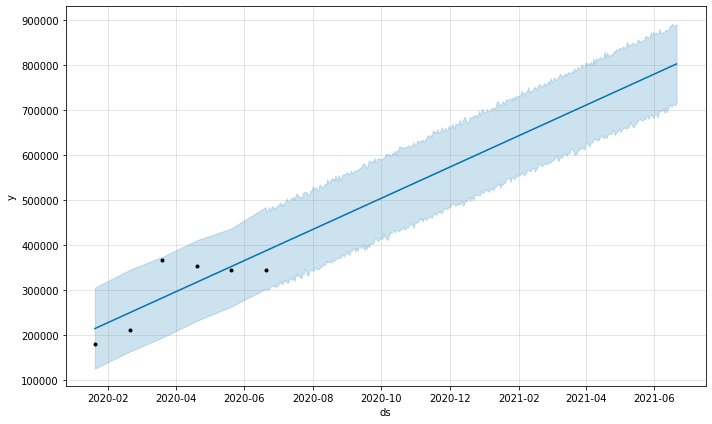

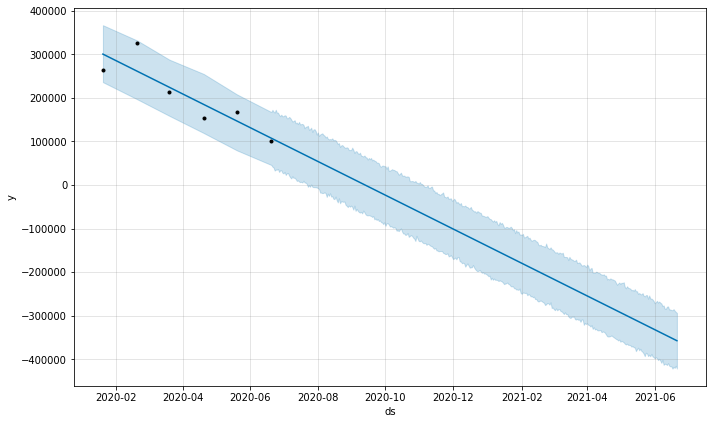

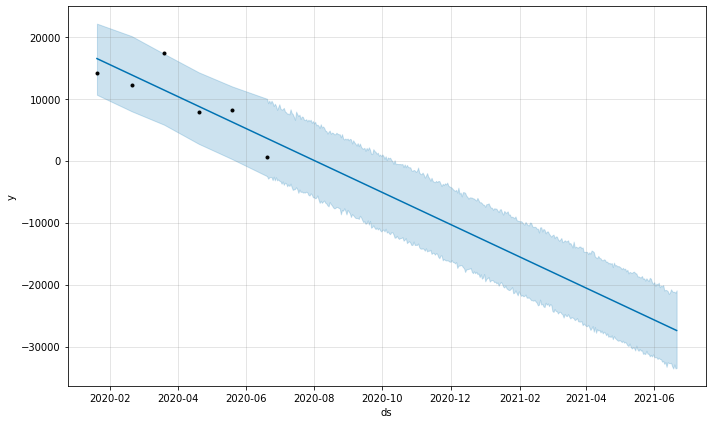

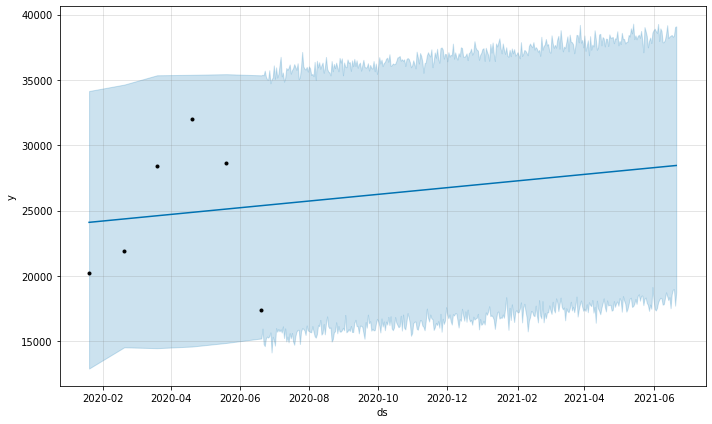

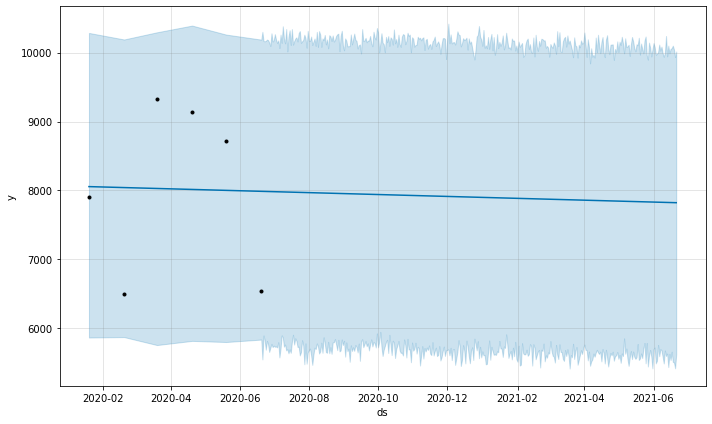

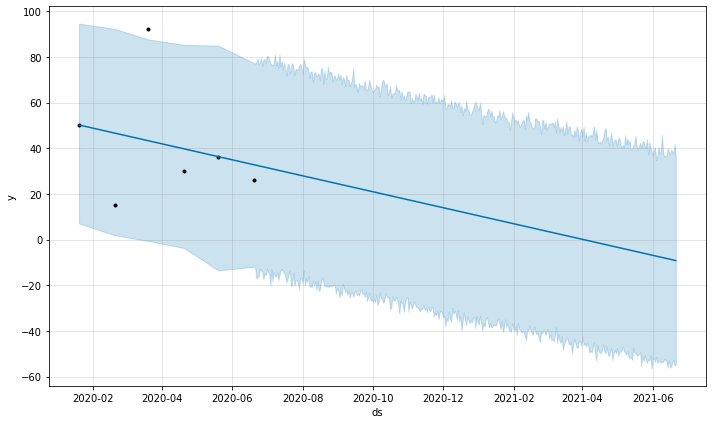

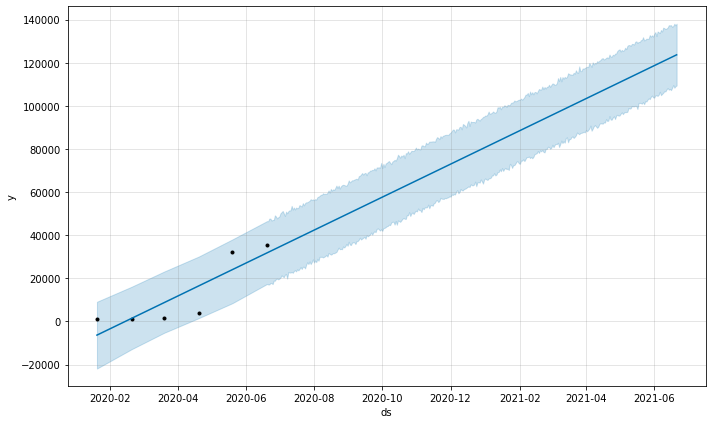

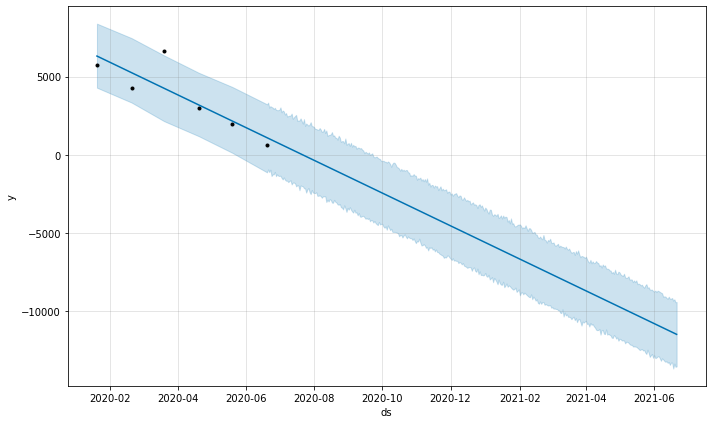

In [ ]:
for item in items.groups:
  group = items.get_group(item)

  model = Prophet(interval_width=0.95)
  model.fit(group)
  future = model.make_future_dataframe(periods=366)
  forecast = model.predict(future)
  model.plot(forecast)
  forecast = forecast.rename(columns={'yhat':'yhat_'+str(item)})
  target = pd.merge(target, forecast.set_index('ds'), how='outer',
                    left_index=True, right_index=True)